<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"
!pip install kagglehub

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import kagglehub
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import warnings
from sklearn.exceptions import ConvergenceWarning

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [4]:
#Downloading data
path = kagglehub.dataset_download("kanchana1990/property-sales-uk-dataset-zoopla-2023-2024")

data = pd.read_csv(path + "\\zp1.csv")
data.head()

,bathrooms,bedrooms,country,currentEnergyRating,floorAreaSqM,fullAddress,historicListings/0/date,historicListings/0/price,historicListings/1/date,historicListings/1/price,...,saleEstimate/ingestedAt,saleEstimate/lowerPrice,saleEstimate/upperPrice,saleEstimate/valueChange/numericChange,saleEstimate/valueChange/percentageChange,saleEstimate/valueChange/saleDate,soldPricesDataSource,tenure,uprn,url
0,NaN,2.0,England,NaN,NaN,"22 Rushmere House, Fontley Way, London, SW15 4LZ",NaN,NaN,NaN,NaN,...,2024-02-08T11:30:32.529Z,188000.0,282000.0,65000.0,38.235294,2023-12-20,landRegistry,Leasehold,100022656860,https://www.zoopla.co.uk/property/uprn/1000226...
1,1.0,3.0,England,NaN,NaN,"18 Baxter Close, Uxbridge, UB10 0DE",NaN,NaN,NaN,NaN,...,2024-02-08T11:30:32.529Z,596000.0,658000.0,17000.0,2.786885,2023-12-20,landRegistry,Freehold,100021474638,https://www.zoopla.co.uk/property/uprn/1000214...
2,NaN,NaN,England,B,77.0,"Flat 29, Somerset Place, 10 Brixton Hill, Lond...",NaN,NaN,NaN,NaN,...,2024-02-08T11:30:32.529Z,611000.0,675000.0,-17000.0,-2.575758,2023-12-20,landRegistry,Leasehold,10093379009,https://www.zoopla.co.uk/property/uprn/1009337...
3,NaN,4.0,England,NaN,139.0,"196 Brampton Road, Bexleyheath, DA7 4SY",NaN,NaN,NaN,NaN,...,2024-02-08T11:30:32.529Z,594000.0,656000.0,315000.0,101.612903,2023-12-20,landRegistry,Freehold,100020203162,https://www.zoopla.co.uk/property/uprn/1000202...
4,2.0,3.0,England,D,103.0,"110 Augustus Road, London, SW19 6ER",2024-02-06,650000.0,2015-09-08,699950.0,...,2024-02-08T11:30:32.529Z,774000.0,855000.0,265000.0,48.181818,2023-12-20,landRegistry,Freehold,100022608822,https://www.zoopla.co.uk/property/uprn/1000226...


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


The data contains information about the sale of 1000 properties in England between 2023 and 2024. Most of these properties are in or close to London. Information includes the number of bedrooms, bathrooms, and living rooms in a property, the area of the buildings floor, the energy rating of the property, listing prices of the property, sale prices of the property, and geographical information such as longirude, latitude, and address of the property.

In [5]:
#Display the raw data
data

,bathrooms,bedrooms,country,currentEnergyRating,floorAreaSqM,fullAddress,historicListings/0/date,historicListings/0/price,historicListings/1/date,historicListings/1/price,...,saleEstimate/ingestedAt,saleEstimate/lowerPrice,saleEstimate/upperPrice,saleEstimate/valueChange/numericChange,saleEstimate/valueChange/percentageChange,saleEstimate/valueChange/saleDate,soldPricesDataSource,tenure,uprn,url
0,NaN,2.0,England,NaN,NaN,"22 Rushmere House, Fontley Way, London, SW15 4LZ",NaN,NaN,NaN,NaN,...,2024-02-08T11:30:32.529Z,188000.0,282000.0,65000.0,38.235294,2023-12-20,landRegistry,Leasehold,100022656860,https://www.zoopla.co.uk/property/uprn/1000226...
1,1.0,3.0,England,NaN,NaN,"18 Baxter Close, Uxbridge, UB10 0DE",NaN,NaN,NaN,NaN,...,2024-02-08T11:30:32.529Z,596000.0,658000.0,17000.0,2.786885,2023-12-20,landRegistry,Freehold,100021474638,https://www.zoopla.co.uk/property/uprn/1000214...
2,NaN,NaN,England,B,77.0,"Flat 29, Somerset Place, 10 Brixton Hill, Lond...",NaN,NaN,NaN,NaN,...,2024-02-08T11:30:32.529Z,611000.0,675000.0,-17000.0,-2.575758,2023-12-20,landRegistry,Leasehold,10093379009,https://www.zoopla.co.uk/property/uprn/1009337...
3,NaN,4.0,England,NaN,139.0,"196 Brampton Road, Bexleyheath, DA7 4SY",NaN,NaN,NaN,NaN,...,2024-02-08T11:30:32.529Z,594000.0,656000.0,315000.0,101.612903,2023-12-20,landRegistry,Freehold,100020203162,https://www.zoopla.co.uk/property/uprn/1000202...
4,2.0,3.0,England,D,103.0,"110 Augustus Road, London, SW19 6ER",2024-02-06,650000.0,2015-09-08,699950.0,...,2024-02-08T11:30:32.529Z,774000.0,855000.0,265000.0,48.181818,2023-12-20,landRegistry,Freehold,100022608822,https://www.zoopla.co.uk/property/uprn/1000226...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,2.0,England,C,71.0,"41 Ivy Road, London, SE4 1YS",2023-10-04,350000.0,2023-03-17,351000.0,...,2024-02-08T11:30:32.529Z,334000.0,369000.0,89000.0,33.969466,2023-11-29,landRegistry,Leasehold,100021971611,https://www.zoopla.co.uk/property/uprn/1000219...
996,1.0,2.0,England,C,77.0,"17 Hibbert Road, London, E17 8HB",2019-10-10,530000.0,2012-05-25,265000.0,...,2024-02-08T11:30:32.529Z,426000.0,471000.0,14000.0,3.218391,2023-11-29,landRegistry,Leasehold,100022553395,https://www.zoopla.co.uk/property/uprn/1000225...
997,1.0,2.0,England,C,74.0,"70 Elm Road, Chessington, KT9 1AW",2023-02-23,400000.0,2017-03-27,357500.0,...,2024-02-08T11:30:32.529Z,403000.0,445000.0,24000.0,6.000000,2023-11-29,landRegistry,Freehold,128028716,https://www.zoopla.co.uk/property/uprn/128028716/
998,NaN,1.0,England,B,50.0,"Flat 17, 55 Peckham Grove, London, SE15 6PH",NaN,NaN,NaN,NaN,...,2024-02-08T11:30:32.529Z,343000.0,379000.0,71000.0,24.482759,2023-11-30,landRegistry,Leasehold,10013525976,https://www.zoopla.co.uk/property/uprn/1001352...


In [6]:
#Select the most useful columns
housedata = data[['bathrooms','bedrooms','livingRooms','floorAreaSqM','currentEnergyRating','postcode','latitude','longitude','tenure','historicSales/0/price']]
housedata

,bathrooms,bedrooms,livingRooms,floorAreaSqM,currentEnergyRating,postcode,latitude,longitude,tenure,historicSales/0/price
0,NaN,2.0,NaN,NaN,NaN,SW15 4LZ,51.447114,-0.242907,Leasehold,170000
1,1.0,3.0,2.0,NaN,NaN,UB10 0DE,51.535147,-0.449257,Freehold,610000
2,NaN,NaN,NaN,77.0,B,SW2 1EG,51.459309,-0.117271,Leasehold,660000
3,NaN,4.0,2.0,139.0,NaN,DA7 4SY,51.472394,0.129239,Freehold,310000
4,2.0,3.0,1.0,103.0,D,SW19 6ER,51.443314,-0.217511,Freehold,550000
...,...,...,...,...,...,...,...,...,...,...
995,1.0,2.0,1.0,71.0,C,SE4 1YS,51.458726,-0.031921,Leasehold,262000
996,1.0,2.0,1.0,77.0,C,E17 8HB,51.569901,-0.028016,Leasehold,435000
997,1.0,2.0,1.0,74.0,C,KT9 1AW,51.367968,-0.303188,Freehold,400000
998,NaN,1.0,NaN,50.0,B,SE15 6PH,51.478531,-0.081060,Leasehold,290000


In [7]:
#Determine where missing data is
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathrooms              824 non-null    float64
 1   bedrooms               893 non-null    float64
 2   livingRooms            855 non-null    float64
 3   floorAreaSqM           842 non-null    float64
 4   currentEnergyRating    745 non-null    object 
 5   postcode               1000 non-null   object 
 6   latitude               1000 non-null   float64
 7   longitude              1000 non-null   float64
 8   tenure                 937 non-null    object 
 9   historicSales/0/price  1000 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 78.3+ KB


In [8]:
#Remove Null Values - Difficult to justify replacining with mean, median, or mode
housedata_cleaned = housedata.dropna()
housedata_cleaned

,bathrooms,bedrooms,livingRooms,floorAreaSqM,currentEnergyRating,postcode,latitude,longitude,tenure,historicSales/0/price
4,2.0,3.0,1.0,103.0,D,SW19 6ER,51.443314,-0.217511,Freehold,550000
6,1.0,3.0,1.0,93.0,D,N2 0SW,51.593267,-0.178249,Freehold,687500
8,2.0,3.0,2.0,118.0,D,TW1 3NR,51.446776,-0.326778,Leasehold,180000
9,2.0,4.0,2.0,109.0,D,HA8 8XW,51.630187,-0.271890,Freehold,540000
10,1.0,3.0,1.0,80.0,E,HA3 5NE,51.601300,-0.350395,Freehold,310000
...,...,...,...,...,...,...,...,...,...,...
994,2.0,3.0,1.0,102.0,D,EN1 3AL,51.652700,-0.072680,Freehold,475000
995,1.0,2.0,1.0,71.0,C,SE4 1YS,51.458726,-0.031921,Leasehold,262000
996,1.0,2.0,1.0,77.0,C,E17 8HB,51.569901,-0.028016,Leasehold,435000
997,1.0,2.0,1.0,74.0,C,KT9 1AW,51.367968,-0.303188,Freehold,400000


In [9]:
#Extract postcode area from postcode
housedata_cleaned['postcodearea'] = housedata_cleaned['postcode'].str.extract(r'([A-Z]{1,2})\d')
housedata_cleaned = housedata_cleaned.drop(columns=['postcode'])
housedata_cleaned

C:\Users\rober\AppData\Local\Temp\ipykernel_45900\3810891472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housedata_cleaned['postcodearea'] = housedata_cleaned['postcode'].str.extract(r'([A-Z]{1,2})\d')


,bathrooms,bedrooms,livingRooms,floorAreaSqM,currentEnergyRating,latitude,longitude,tenure,historicSales/0/price,postcodearea
4,2.0,3.0,1.0,103.0,D,51.443314,-0.217511,Freehold,550000,SW
6,1.0,3.0,1.0,93.0,D,51.593267,-0.178249,Freehold,687500,N
8,2.0,3.0,2.0,118.0,D,51.446776,-0.326778,Leasehold,180000,TW
9,2.0,4.0,2.0,109.0,D,51.630187,-0.271890,Freehold,540000,HA
10,1.0,3.0,1.0,80.0,E,51.601300,-0.350395,Freehold,310000,HA
...,...,...,...,...,...,...,...,...,...,...
994,2.0,3.0,1.0,102.0,D,51.652700,-0.072680,Freehold,475000,EN
995,1.0,2.0,1.0,71.0,C,51.458726,-0.031921,Leasehold,262000,SE
996,1.0,2.0,1.0,77.0,C,51.569901,-0.028016,Leasehold,435000,E
997,1.0,2.0,1.0,74.0,C,51.367968,-0.303188,Freehold,400000,KT


In [10]:
#Display counts of non-numerical features
print(housedata_cleaned['currentEnergyRating'].value_counts())
print(housedata_cleaned['tenure'].value_counts())
print(housedata_cleaned['postcodearea'].value_counts())

currentEnergyRating
D    235
C    218
B     70
E     51
F      4
G      1
A      1
Name: count, dtype: int64
tenure
Leasehold    324
Freehold     243
Feudal        11
Shared         2
Name: count, dtype: int64
postcodearea
SW    71
SE    71
N     61
E     53
W     48
HA    42
NW    34
KT    28
BR    26
TW    23
EN    20
SM    20
CR    19
UB    18
RM    15
IG    15
DA    14
WC     2
Name: count, dtype: int64


In [11]:
#Remove very uncommon tenures
housedata_cleaned = housedata_cleaned[housedata_cleaned['tenure'] != 'Feudal']
housedata_cleaned = housedata_cleaned[housedata_cleaned['tenure'] != 'Shared']
print(housedata_cleaned['currentEnergyRating'].value_counts())
print(housedata_cleaned['tenure'].value_counts())
print(housedata_cleaned['postcodearea'].value_counts())

currentEnergyRating
D    230
C    213
B     68
E     50
F      4
G      1
A      1
Name: count, dtype: int64
tenure
Leasehold    324
Freehold     243
Name: count, dtype: int64
postcodearea
SE    70
SW    69
N     61
E     52
W     45
HA    42
NW    34
KT    27
BR    26
TW    23
SM    19
UB    18
EN    18
CR    18
IG    15
RM    14
DA    14
WC     2
Name: count, dtype: int64


In [12]:
#Initialise the label encoder
le = LabelEncoder()
#Transform the energy rating column using label encoder
housedata_cleaned['numericalEnergyRating'] = le.fit_transform(housedata_cleaned['currentEnergyRating']) #A=0,B=1,C=2,D=3,E=4,F=5,G=6
housedata_cleaned = housedata_cleaned.drop(columns=['currentEnergyRating'])
housedata_cleaned

,bathrooms,bedrooms,livingRooms,floorAreaSqM,latitude,longitude,tenure,historicSales/0/price,postcodearea,numericalEnergyRating
4,2.0,3.0,1.0,103.0,51.443314,-0.217511,Freehold,550000,SW,3
6,1.0,3.0,1.0,93.0,51.593267,-0.178249,Freehold,687500,N,3
8,2.0,3.0,2.0,118.0,51.446776,-0.326778,Leasehold,180000,TW,3
9,2.0,4.0,2.0,109.0,51.630187,-0.271890,Freehold,540000,HA,3
10,1.0,3.0,1.0,80.0,51.601300,-0.350395,Freehold,310000,HA,4
...,...,...,...,...,...,...,...,...,...,...
994,2.0,3.0,1.0,102.0,51.652700,-0.072680,Freehold,475000,EN,3
995,1.0,2.0,1.0,71.0,51.458726,-0.031921,Leasehold,262000,SE,2
996,1.0,2.0,1.0,77.0,51.569901,-0.028016,Leasehold,435000,E,2
997,1.0,2.0,1.0,74.0,51.367968,-0.303188,Freehold,400000,KT,2


In [13]:
#Longitude and Latitude of London (Oxford Circus)
london_latitude = 51.5153
london_longitude = -0.1420
#Function that calculates distance using the Haversine Formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  #Radius of the Earth in kilometers (Between 6378.1km and 6356.8km https://sci.esa.int/web/solar-system/-/35649-earth)
    d_lat = np.radians(lat2 - lat1)
    d_lon = np.radians(lon2 - lon1)
    
    a = np.sin(d_lat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(d_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c  #Distance in kilometers
    return distance

#Creates a column for distance from London
housedata_cleaned['Distance from London (km)'] = housedata_cleaned.apply(
    lambda row: haversine(row['latitude'], row['longitude'], london_latitude, london_longitude), axis=1
)
#Displays the data
housedata_cleaned = housedata_cleaned.drop(columns=['latitude'])
housedata_cleaned = housedata_cleaned.drop(columns=['longitude'])
housedata_cleaned

,bathrooms,bedrooms,livingRooms,floorAreaSqM,tenure,historicSales/0/price,postcodearea,numericalEnergyRating,Distance from London (km)
4,2.0,3.0,1.0,103.0,Freehold,550000,SW,3,9.561237
6,1.0,3.0,1.0,93.0,Freehold,687500,N,3,9.024471
8,2.0,3.0,2.0,118.0,Leasehold,180000,TW,3,14.892492
9,2.0,4.0,2.0,109.0,Freehold,540000,HA,3,15.613386
10,1.0,3.0,1.0,80.0,Freehold,310000,HA,4,17.291610
...,...,...,...,...,...,...,...,...,...
994,2.0,3.0,1.0,102.0,Freehold,475000,EN,3,16.011353
995,1.0,2.0,1.0,71.0,Leasehold,262000,SE,2,9.882657
996,1.0,2.0,1.0,77.0,Leasehold,435000,E,2,9.949790
997,1.0,2.0,1.0,74.0,Freehold,400000,KT,2,19.829199


In [14]:
#Binary encode tenure column
housedata_cleaned['freehold'] = housedata_cleaned['tenure'].replace({'Freehold': 1, 'Leasehold': 0})
housedata_cleaned = housedata_cleaned.drop(columns=['tenure'])
#Rename column
housedata_cleaned.rename(columns={'historicSales/0/price': 'price'}, inplace=True)

C:\Users\rober\AppData\Local\Temp\ipykernel_45900\1544004818.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata_cleaned['freehold'] = housedata_cleaned['tenure'].replace({'Freehold': 1, 'Leasehold': 0})


In [15]:
#Statistics of the data
housedata_cleaned.describe(include='all')

,bathrooms,bedrooms,livingRooms,floorAreaSqM,price,postcodearea,numericalEnergyRating,Distance from London (km),freehold
count,567.000000,567.000000,567.000000,567.000000,5.670000e+02,567,567.000000,567.000000,567.000000
unique,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,SE,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,70,NaN,NaN,NaN
mean,1.343915,2.373898,1.261023,92.361552,5.690852e+05,NaN,2.486772,12.424029,0.428571
std,0.597309,1.047236,0.550247,42.565827,3.910010e+05,NaN,0.861065,5.663748,0.495309
min,1.000000,1.000000,1.000000,35.000000,8.000000e+04,NaN,0.000000,0.461651,0.000000
25%,1.000000,2.000000,1.000000,65.000000,3.525000e+05,NaN,2.000000,7.974190,0.000000
50%,1.000000,2.000000,1.000000,84.000000,4.950000e+05,NaN,3.000000,12.255966,0.000000
75%,2.000000,3.000000,1.000000,106.000000,6.887500e+05,NaN,3.000000,16.360614,1.000000


In [16]:
#Display the cleaned data
housedata_cleaned

,bathrooms,bedrooms,livingRooms,floorAreaSqM,price,postcodearea,numericalEnergyRating,Distance from London (km),freehold
4,2.0,3.0,1.0,103.0,550000,SW,3,9.561237,1
6,1.0,3.0,1.0,93.0,687500,N,3,9.024471,1
8,2.0,3.0,2.0,118.0,180000,TW,3,14.892492,0
9,2.0,4.0,2.0,109.0,540000,HA,3,15.613386,1
10,1.0,3.0,1.0,80.0,310000,HA,4,17.291610,1
...,...,...,...,...,...,...,...,...,...
994,2.0,3.0,1.0,102.0,475000,EN,3,16.011353,1
995,1.0,2.0,1.0,71.0,262000,SE,2,9.882657,0
996,1.0,2.0,1.0,77.0,435000,E,2,9.949790,0
997,1.0,2.0,1.0,74.0,400000,KT,2,19.829199,1


# 2. Objectives


The main objective is use machine learning to predict the house prices of houses in and around London.

In [17]:
#Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [18]:
#Filter for numeric columns
numeric_housedata_cleaned = housedata_cleaned.select_dtypes(include=['number'])

#Calculate skewness for numeric columns
skewness = numeric_housedata_cleaned.skew()

#Display skewness values
print(skewness.sort_values(ascending=False))

price                        3.553347
bathrooms                    2.392722
livingRooms                  2.338413
floorAreaSqM                 2.331679
bedrooms                     0.836866
freehold                     0.289441
Distance from London (km)    0.192665
numericalEnergyRating        0.132693
dtype: float64


log_price          -0.099617
log_bathrooms       1.428218
log_livingRooms     1.860100
log_floorAreaSqM    0.575627
log_bedrooms       -0.031307
dtype: float64


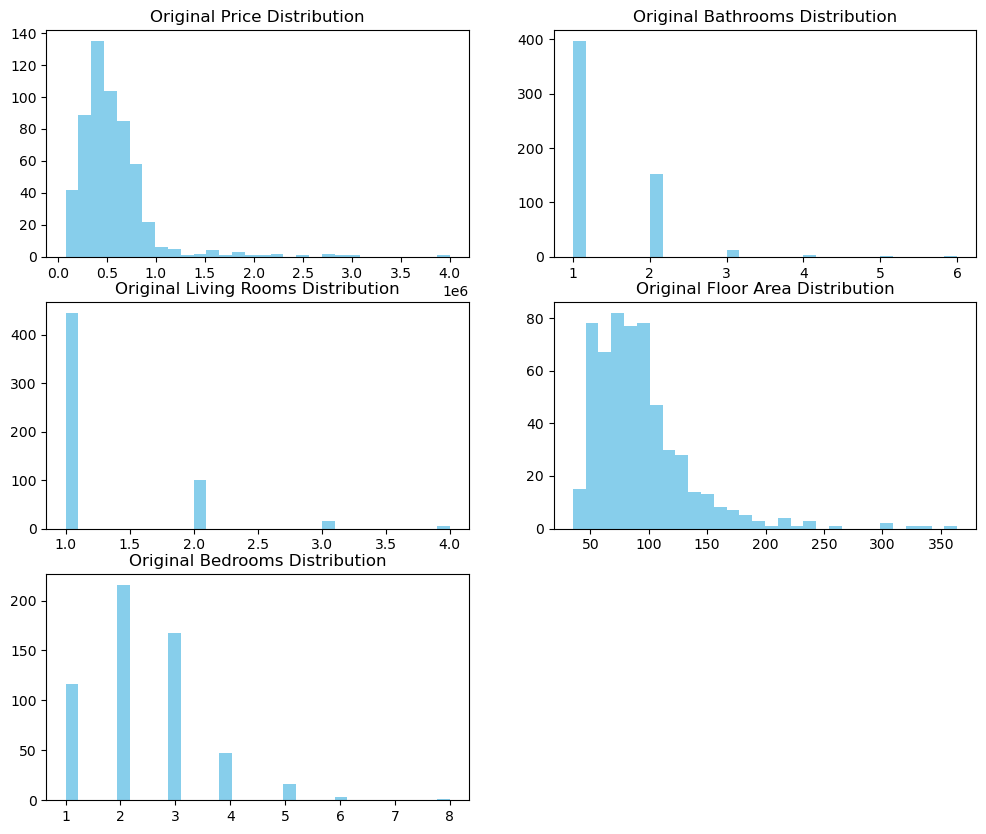

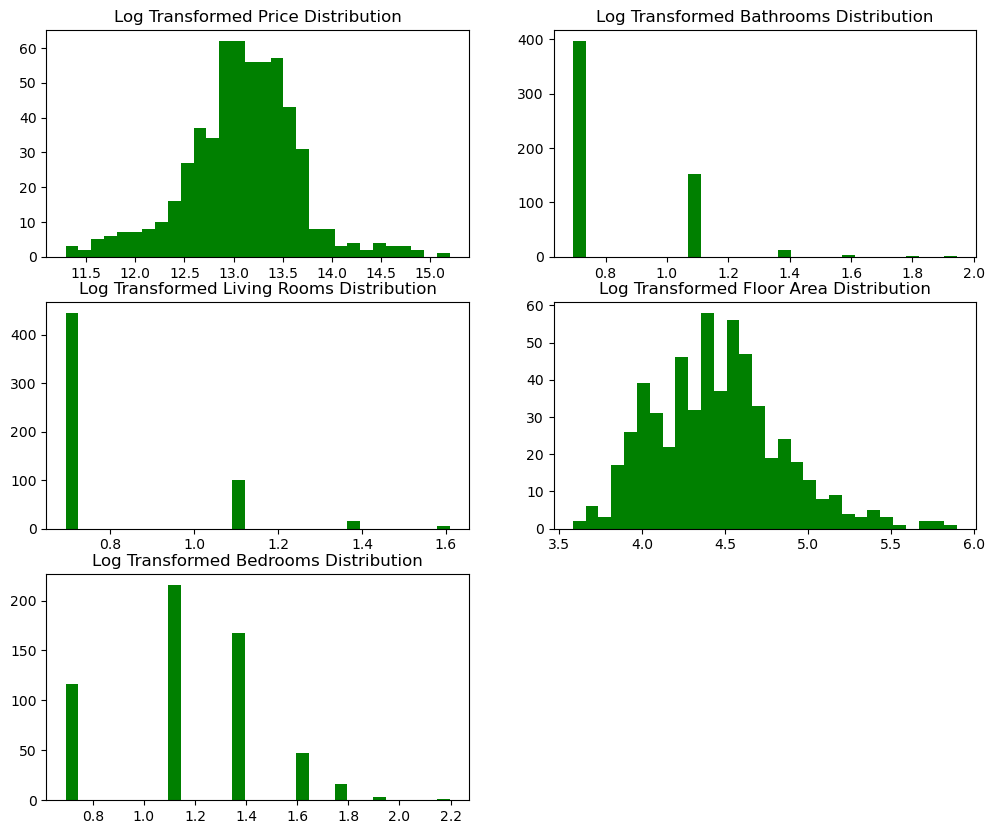

In [25]:
#Apply log transformation to the most skewed features
housedata_cleaned['log_price'] = np.log1p(housedata_cleaned['price'])
housedata_cleaned['log_bathrooms'] = np.log1p(housedata_cleaned['bathrooms'])
housedata_cleaned['log_livingRooms'] = np.log1p(housedata_cleaned['livingRooms'])
housedata_cleaned['log_floorAreaSqM'] = np.log1p(housedata_cleaned['floorAreaSqM'])
housedata_cleaned['log_bedrooms'] = np.log1p(housedata_cleaned['bedrooms'])

#Calculate skewness for log transformed features
skewness_transformed = housedata_cleaned[['log_price', 'log_bathrooms', 'log_livingRooms', 'log_floorAreaSqM','log_bedrooms']].skew()

#Display skewness values
print(skewness_transformed)

#Plot original and log-transformed distributions
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

#Original distributions
axes[0, 0].hist(housedata_cleaned['price'], bins=30, color='skyblue')
axes[0, 0].set_title('Original Price Distribution')
axes[0, 1].hist(housedata_cleaned['bathrooms'], bins=30, color='skyblue')
axes[0, 1].set_title('Original Bathrooms Distribution')
axes[1, 0].hist(housedata_cleaned['livingRooms'], bins=30, color='skyblue')
axes[1, 0].set_title('Original Living Rooms Distribution')
axes[1, 1].hist(housedata_cleaned['floorAreaSqM'], bins=30, color='skyblue')
axes[1, 1].set_title('Original Floor Area Distribution')
axes[2, 0].hist(housedata_cleaned['bedrooms'], bins=30, color='skyblue')
axes[2, 0].set_title('Original Bedrooms Distribution')
axes[2, 1].axis('off')

#Transformed distributions
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

axes[0, 0].hist(housedata_cleaned['log_price'], bins=30, color='green')
axes[0, 0].set_title('Log Transformed Price Distribution')
axes[0, 1].hist(housedata_cleaned['log_bathrooms'], bins=30, color='green')
axes[0, 1].set_title('Log Transformed Bathrooms Distribution')
axes[1, 0].hist(housedata_cleaned['log_livingRooms'], bins=30, color='green')
axes[1, 0].set_title('Log Transformed Living Rooms Distribution')
axes[1, 1].hist(housedata_cleaned['log_floorAreaSqM'], bins=30, color='green')
axes[1, 1].set_title('Log Transformed Floor Area Distribution')
axes[2, 0].hist(housedata_cleaned['log_bedrooms'], bins=30, color='green')
axes[2, 0].set_title('Log Transformed Bedrooms Distribution')
axes[2, 1].axis('off')

plt.show()

housedata_cleaned = housedata_cleaned.drop(columns=['price','bathrooms','livingRooms','floorAreaSqM','bedrooms']) #Features

In [26]:
housedata_cleaned

,postcodearea,numericalEnergyRating,Distance from London (km),freehold,log_price,log_bathrooms,log_livingRooms,log_floorAreaSqM,log_bedrooms
4,SW,3,9.561237,1,13.217675,1.098612,0.693147,4.644391,1.386294
6,N,3,9.024471,1,13.440819,0.693147,0.693147,4.543295,1.386294
8,TW,3,14.892492,0,12.100718,1.098612,1.098612,4.779123,1.386294
9,HA,3,15.613386,1,13.199326,1.098612,1.098612,4.700480,1.609438
10,HA,4,17.291610,1,12.644331,0.693147,0.693147,4.394449,1.386294
...,...,...,...,...,...,...,...,...,...
994,EN,3,16.011353,1,13.071072,1.098612,0.693147,4.634729,1.386294
995,SE,2,9.882657,0,12.476104,0.693147,0.693147,4.276666,1.098612
996,E,2,9.949790,0,12.983104,0.693147,0.693147,4.356709,1.098612
997,KT,2,19.829199,1,12.899222,0.693147,0.693147,4.317488,1.098612


# 3. Linear Regression Models


Use of Ridge, Lasso, and Elastic Net Models.

In [28]:
#Define feature columns and target variable
X = housedata_cleaned.drop(columns=['log_price']) #Features
y = housedata_cleaned['log_price']  #Target variable (price)

#Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['log_bathrooms', 'log_bedrooms', 'log_livingRooms', 'log_floorAreaSqM', 'numericalEnergyRating', 'Distance from London (km)']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['postcodearea']),
        ('freehold', 'passthrough', ['freehold'])  #No tranformation
    ])

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
#Define parameter grid for Ridge, Lasso, and ElasticNet
param_grid = {'alpha': [1, 0.5, 0.1, 0.01, 0.001, 0.0001]}

#Ridge Regression
ridge_grid_search = GridSearchCV(Ridge(), param_grid, cv=10, scoring='r2')

#Create pipeline with preprocessing for Ridge
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ridge_grid_search)
])

#Fit the model
ridge_pipeline.fit(X_train, y_train)

#Best model and score for Ridge
print(f"Best alpha for Ridge: {ridge_grid_search.best_params_}")
print(f"Best R-squared score for Ridge: {ridge_grid_search.best_score_}")

#Lasso Regression
lasso_grid_search = GridSearchCV(Lasso(), param_grid, cv=10, scoring='r2')

#Create pipeline with preprocessing for Lasso
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_grid_search)
])

#Fit the model
lasso_pipeline.fit(X_train, y_train)

#Best model and score for Lasso
print(f"Best alpha for Lasso: {lasso_grid_search.best_params_}")
print(f"Best R-squared score for Lasso: {lasso_grid_search.best_score_}")

#ElasticNet Regression
elasticnet_grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10, scoring='r2')

#Create pipeline with preprocessing for ElasticNet
elasticnet_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', elasticnet_grid_search)
])

#Fit the model
elasticnet_pipeline.fit(X_train, y_train)

#Best model and score for ElasticNet
print(f"Best alpha for ElasticNet: {elasticnet_grid_search.best_params_}")
print(f"Best R-squared score for ElasticNet: {elasticnet_grid_search.best_score_}")

Best alpha for Ridge: {'alpha': 1}
Best R-squared score for Ridge: 0.6254534257985014
Best alpha for Lasso: {'alpha': 0.001}
Best R-squared score for Lasso: 0.6249579834784278
Best alpha for ElasticNet: {'alpha': 0.001}
Best R-squared score for ElasticNet: 0.6243783789821784


In [30]:
#Ridge Regression best model
ridge_best_model = ridge_grid_search.best_estimator_
ridge_coefs = ridge_best_model.coef_

#Lasso Regression best model
lasso_best_model = lasso_grid_search.best_estimator_
lasso_coefs = lasso_best_model.coef_

#ElasticNet Regression best model
elasticnet_best_model = elasticnet_grid_search.best_estimator_
elasticnet_coefs = elasticnet_best_model.coef_

#One-hot encoded feature names
ohe_columns = preprocessor.transformers_[1][1].get_feature_names_out(['postcodearea'])

#Combine numeric features and one-hot encoded features
feature_names = ['bathrooms', 'bedrooms', 'livingRooms', 'floorAreaSqM', 'numericalEnergyRating', 'Distance from London (km)'] + list(ohe_columns) + ['freehold']

#Combine feature names with coefficients for each model
ridge_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge_coefs})
lasso_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefs})
elasticnet_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': elasticnet_coefs})

#Sort by absolute value of coefficients to identify important features
ridge_importance['AbsCoefficient'] = ridge_importance['Coefficient'].abs()
lasso_importance['AbsCoefficient'] = lasso_importance['Coefficient'].abs()
elasticnet_importance['AbsCoefficient'] = elasticnet_importance['Coefficient'].abs()

ridge_importance_sorted = ridge_importance.sort_values(by='AbsCoefficient', ascending=False)
lasso_importance_sorted = lasso_importance.sort_values(by='AbsCoefficient', ascending=False)
elasticnet_importance_sorted = elasticnet_importance.sort_values(by='AbsCoefficient', ascending=False)

#Display the sorted results
print("Ridge Regression Feature Importance:")
print(ridge_importance_sorted[['Feature', 'Coefficient']])

print("\nLasso Regression Feature Importance:")
print(lasso_importance_sorted[['Feature', 'Coefficient']])

print("\nElasticNet Regression Feature Importance:")
print(elasticnet_importance_sorted[['Feature', 'Coefficient']])

Ridge Regression Feature Importance:
                      Feature  Coefficient
3                floorAreaSqM     0.330502
24                   freehold     0.283538
23            postcodearea_WC     0.256142
12            postcodearea_IG    -0.221643
13            postcodearea_KT     0.207018
5   Distance from London (km)    -0.203795
7             postcodearea_CR    -0.171270
11            postcodearea_HA    -0.165263
8             postcodearea_DA    -0.151373
22             postcodearea_W     0.148202
21            postcodearea_UB     0.128324
20            postcodearea_TW     0.126675
14             postcodearea_N    -0.121873
17            postcodearea_SE    -0.114379
19            postcodearea_SW     0.091436
15            postcodearea_NW     0.065249
6             postcodearea_BR    -0.056744
0                   bathrooms     0.050797
16            postcodearea_RM     0.042022
18            postcodearea_SM    -0.040454
10            postcodearea_EN    -0.031475
1                

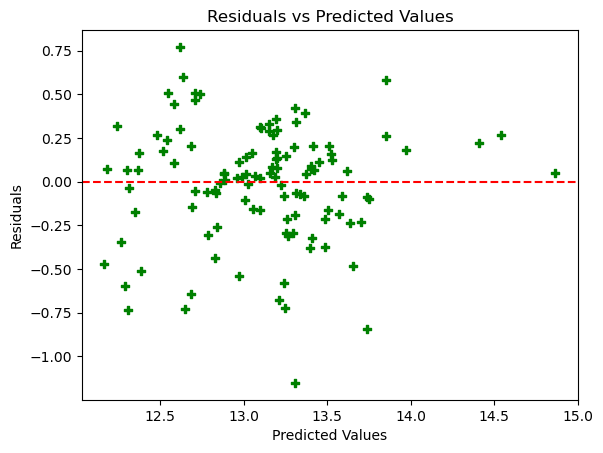

In [31]:
#Make predictions based on test data
y_pred_e = elasticnet_pipeline.predict(X_test)

#Calculate residuals
residuals_e = y_test - y_pred_e

#Plot residuals against predicted values
import matplotlib.pyplot as plt
plt.scatter(y_pred_e, residuals_e, color='green', marker='P')
plt.axhline(0, color='red', linestyle='--') #Line where residuals = 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

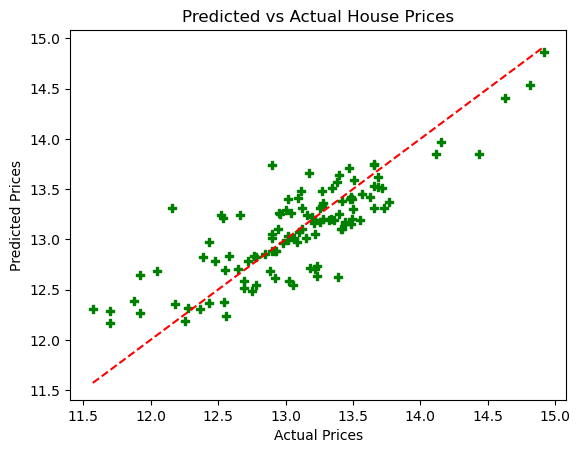

In [32]:
#Plot predicted values against actual values
plt.scatter(y_test, y_pred_e, color='green', marker='P')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  #Line of perfect fit
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.show()

In [33]:
#Define feature columns and target variable
X = housedata_cleaned.drop(columns=['log_price'])  #Features
y = housedata_cleaned['log_price']  #Target variable (price)

#Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['log_bathrooms', 'log_bedrooms', 'log_livingRooms', 'log_floorAreaSqM', 'numericalEnergyRating', 'Distance from London (km)']),
        ('freehold', 'passthrough', ['freehold'])  #No tranformation
    ])

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
#Define parameter grid for Ridge, Lasso, and ElasticNet
param_grid = {'alpha': [1, 0.5, 0.1, 0.01, 0.001, 0.0001]}

#Ridge Regression
ridge_grid_search = GridSearchCV(Ridge(), param_grid, cv=10, scoring='r2')

#Create pipeline with preprocessing for Ridge
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ridge_grid_search)
])

#Fit the model
ridge_pipeline.fit(X_train, y_train)

#Best model and score for Ridge
print(f"Best alpha for Ridge: {ridge_grid_search.best_params_}")
print(f"Best R-squared score for Ridge: {ridge_grid_search.best_score_}")

#Lasso Regression
lasso_grid_search = GridSearchCV(Lasso(), param_grid, cv=10, scoring='r2')

#Create pipeline with preprocessing for Lasso
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_grid_search)
])

#Fit the model
lasso_pipeline.fit(X_train, y_train)

#Best model and score for Lasso
print(f"Best alpha for Lasso: {lasso_grid_search.best_params_}")
print(f"Best R-squared score for Lasso: {lasso_grid_search.best_score_}")

#ElasticNet Regression
elasticnet_grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10, scoring='r2')

#Create pipeline with preprocessing for ElasticNet
elasticnet_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', elasticnet_grid_search)
])

#Fit the model
elasticnet_pipeline.fit(X_train, y_train)

#Best model and score for ElasticNet
print(f"Best alpha for ElasticNet: {elasticnet_grid_search.best_params_}")
print(f"Best R-squared score for ElasticNet: {elasticnet_grid_search.best_score_}")

Best alpha for Ridge: {'alpha': 1}
Best R-squared score for Ridge: 0.6120111050011514
Best alpha for Lasso: {'alpha': 0.01}
Best R-squared score for Lasso: 0.6149808254030797
Best alpha for ElasticNet: {'alpha': 0.01}
Best R-squared score for ElasticNet: 0.6141717807975585


In [35]:
#Ridge Regression best model
ridge_best_model = ridge_grid_search.best_estimator_
ridge_coefs = ridge_best_model.coef_

#Lasso Regression best model
lasso_best_model = lasso_grid_search.best_estimator_
lasso_coefs = lasso_best_model.coef_

#ElasticNet Regression best model
elasticnet_best_model = elasticnet_grid_search.best_estimator_
elasticnet_coefs = elasticnet_best_model.coef_

#Combine numeric features and one-hot encoded features
feature_names = ['bathrooms', 'bedrooms', 'livingRooms', 'floorAreaSqM', 'numericalEnergyRating', 'Distance from London (km)'] + ['freehold']

#Combine feature names with coefficients for each model
ridge_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge_coefs})
lasso_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefs})
elasticnet_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': elasticnet_coefs})

#Sort by absolute value of coefficients to identify important features
ridge_importance['AbsCoefficient'] = ridge_importance['Coefficient'].abs()
lasso_importance['AbsCoefficient'] = lasso_importance['Coefficient'].abs()
elasticnet_importance['AbsCoefficient'] = elasticnet_importance['Coefficient'].abs()

ridge_importance_sorted = ridge_importance.sort_values(by='AbsCoefficient', ascending=False)
lasso_importance_sorted = lasso_importance.sort_values(by='AbsCoefficient', ascending=False)
elasticnet_importance_sorted = elasticnet_importance.sort_values(by='AbsCoefficient', ascending=False)

#Display the sorted results
print("Ridge Regression Feature Importance:")
print(ridge_importance_sorted[['Feature', 'Coefficient']])

print("\nLasso Regression Feature Importance:")
print(lasso_importance_sorted[['Feature', 'Coefficient']])

print("\nElasticNet Regression Feature Importance:")
print(elasticnet_importance_sorted[['Feature', 'Coefficient']])

Ridge Regression Feature Importance:
                     Feature  Coefficient
3               floorAreaSqM     0.296228
6                   freehold     0.271805
5  Distance from London (km)    -0.221678
0                  bathrooms     0.070100
2                livingRooms    -0.023524
1                   bedrooms     0.021135
4      numericalEnergyRating    -0.008911

Lasso Regression Feature Importance:
                     Feature  Coefficient
3               floorAreaSqM     0.298885
5  Distance from London (km)    -0.203976
6                   freehold     0.191013
0                  bathrooms     0.058031
1                   bedrooms     0.021947
2                livingRooms    -0.000000
4      numericalEnergyRating    -0.000000

ElasticNet Regression Feature Importance:
                     Feature  Coefficient
3               floorAreaSqM     0.293700
6                   freehold     0.222009
5  Distance from London (km)    -0.211552
0                  bathrooms     0.064989


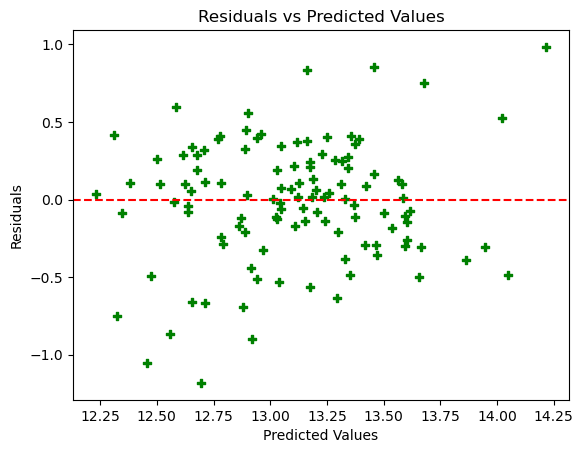

In [36]:
#Make predictions based on test data
y_pred_e2 = elasticnet_pipeline.predict(X_test)

#Calculate residuals
residuals_e2 = y_test - y_pred_e2

#Plot residuals against predicted values
import matplotlib.pyplot as plt
plt.scatter(y_pred_e2, residuals_e2, color='green', marker='P')
plt.axhline(0, color='red', linestyle='--') #Line where residuals = 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

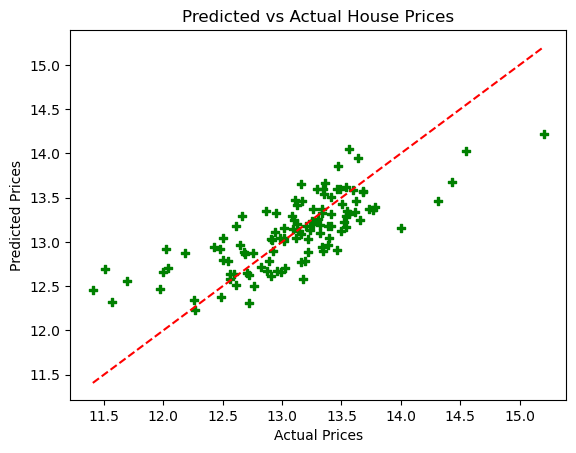

In [37]:
#Plot predicted values against actual values
plt.scatter(y_test, y_pred_e2, color='green', marker='P')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  #Line of perfect fit
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.show()

# 4. Insights and key findings


The Ridge, Lasso, and Elastic Net models all performed similarly well. They had R-squared scores of ~0.62 including post code areas and ~0.61 excluding post code areas.

The best alpha value for Ridge Regression was found to be 1, where as it was 0.001 including post code areas, and 0.01 excluding post code areas for Lasso and Elastic Net which indicates stronger regularisation, with very similar performance.

The randomness of the Residuals vs Predicted Values plot with most values being between -0.5 and 0.5 suggests no obvious overfitting or underfitting howver it does higlight some large errors.

The predicted vs actual house price plot shows that there is a consistent over estimation of verry low value houses and an under estimation of the highest value houses this could suggest that more features are required, or additional feature engineering is required to capture effects at the extremes.

FloorAreaSqM was the most important feature in every model, showing a significant positive relationship with the price.
The property being freehold was also important in all three models, contributing positively to the price.
Distance from the centre of London was consistently negative across all models, suggesting that as the distance from London increases, the price decreases.
The most impactful post code areas were not consistent across all of the models however WC (Western Central) was the most impactful in both the Ridge and Elastic Net models, however our dataset only contained two properties from this post code area potentially overemphasising it due to rarity.
Lasso Regeression pushed living rooms and energy rating to 0 suggesting they have a very minimal affect on property value.
Out of number of bathrooms, bedrooms, and living rooms - more bathrooms consistently had a greater effect.
Having more living rooms tended to reduce the value of the property - this suggests that it is the least valuable room type as more bathrooms and bedrooms would increase price of the property. How you use the floor space matters even if it doesn't matter as much as having additional floor space.

# 5. Next Steps


Obtaining more data for a larger training and testing set with more properties across all of the post code areas.

Creatation of New Features including: interation terms (Features made from multiplying other features), and squaring and cubing features.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
